# (8주차) 11월1일 
> groupby, tidydata, barplot, 해들리위컴의 그래프레이어, 심슨의역설

- toc:true
- branch: master
- badges: true
- comments: true
- author: 최규빈
- categories : [Visual]

### 강의영상 

> youtube: https://youtube.com/playlist?list=PLQqh36zP38-x1JO4T7Sbx6ybq5JhThXn7

`-` (1/12) group by (1) 

`-` (2/12) group by (2)

`-` (3/12) pd.cut (1)

`-` (4/12) pd.cut (2)

`-` (5/12) tidydata (1)

`-` (6/12) tidydata (2)

`-` (7/12) tidydata (3) 

`-` (8/12) Barplot + 해들리위컴 그래프레이어 (1)

`-` (9/12) Barplot + 해들리위컴 그래프레이어 (2)

`-` (10/12) Barplot + 해들리위컴 그래프레이어 (2)

`-` (11/12) 심슨의 역설 (1)

`-` (12/12) 심슨의 역설 (2)

## groupby 

### data 

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/flights.csv')

In [3]:
df

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58487,12,31,4,AA,SFO,DFW,515,5.0,166.0,1464,1045,-19.0,0,0
58488,12,31,4,F9,LAS,SFO,1910,13.0,71.0,414,2050,4.0,0,0
58489,12,31,4,OO,SFO,SBA,1846,-6.0,46.0,262,1956,-5.0,0,0
58490,12,31,4,WN,MSP,ATL,525,39.0,124.0,907,855,34.0,0,0


In [4]:
df.columns

Index(['MONTH', 'DAY', 'WEEKDAY', 'AIRLINE', 'ORG_AIR', 'DEST_AIR',
       'SCHED_DEP', 'DEP_DELAY', 'AIR_TIME', 'DIST', 'SCHED_ARR', 'ARR_DELAY',
       'DIVERTED', 'CANCELLED'],
      dtype='object')

- https://github.com/PacktPublishing/Pandas-Cookbook/blob/master/data/descriptions/flights_description.csv

`-` 데이터프레임을 여러개의 서브데이터프레임으로 나누는 기능 

`-` 단독으로 쓸 이유는 별로 없다. $\to$ 그룹을 나누고 어떠한 "연산"을 하기 위함

In [5]:
df.groupby(by='AIRLINE')

- 데이터프레임을 각 항공사 별로 나눔

`-` 확인

In [6]:
grouped_df = df.groupby(by='AIRLINE')

In [7]:
grouped_df.groups

{'AA': [3, 6, 8, 15, 26, 32, 33, 36, 37, 41, 46, 47, 48, 55, 62, 66, 73, 75, 76, 87, 89, 97, 98, 107, 120, 122, 128, 131, 133, 146, 160, 171, 174, 178, 179, 188, 200, 201, 206, 221, 267, 270, 279, 305, 309, 311, 321, 330, 332, 342, 343, 347, 348, 380, 381, 382, 390, 393, 398, 402, 404, 405, 419, 427, 430, 431, 441, 449, 451, 455, 457, 466, 476, 491, 493, 497, 509, 514, 521, 527, 528, 537, 550, 551, 556, 560, 568, 572, 587, 589, 592, 612, 613, 618, 624, 626, 628, 634, 640, 652, ...], 'AS': [38, 198, 241, 277, 397, 450, 453, 500, 518, 591, 718, 737, 741, 808, 820, 867, 872, 1005, 1106, 1146, 1292, 1437, 1530, 1559, 1609, 1636, 1747, 1786, 1810, 1826, 1892, 1921, 2010, 2151, 2269, 2446, 2526, 2576, 2586, 2941, 3112, 3125, 3171, 3176, 3413, 3483, 3494, 3596, 3678, 3734, 3891, 3910, 3937, 3989, 4099, 4128, 4326, 4397, 4432, 4587, 4743, 4799, 4841, 4850, 4912, 4987, 5099, 5154, 5176, 5254, 5261, 5297, 5356, 5372, 5496, 5667, 5685, 5688, 5877, 5976, 6016, 6079, 6122, 6245, 6255, 6393, 6529, 6

- 너무 보기 힘듬 

`-` 보기좋은 형태로 확인

In [9]:
list(grouped_df.groups)   #그룹들의 이름

['AA',
 'AS',
 'B6',
 'DL',
 'EV',
 'F9',
 'HA',
 'MQ',
 'NK',
 'OO',
 'UA',
 'US',
 'VX',
 'WN']

In [11]:
grouped_df.get_group('AA')   #그룹 이름을 넣어주면 돼

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
6,1,1,4,AA,DFW,MSY,1250,84.0,64.0,447,1410,83.0,0,0
8,1,1,4,AA,ORD,STL,1845,-5.0,44.0,258,1950,-5.0,0,0
15,1,1,4,AA,DEN,DFW,1445,-6.0,93.0,641,1745,4.0,0,0
26,1,1,4,AA,LAX,AUS,1430,33.0,157.0,1242,1925,41.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58470,12,31,4,AA,DFW,FAT,1020,-3.0,196.0,1313,1156,-2.0,0,0
58475,12,31,4,AA,IAH,CLT,710,1.0,113.0,912,1037,-12.0,0,0
58476,12,31,4,AA,DFW,TPA,1020,-3.0,121.0,929,1340,-6.0,0,0
58479,12,31,4,AA,DFW,ELP,1200,3.0,94.0,551,1250,13.0,0,0


In [12]:
for g in grouped_df.groups:
    print(g)
    display(grouped_df.get_group(g))

AA


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
6,1,1,4,AA,DFW,MSY,1250,84.0,64.0,447,1410,83.0,0,0
8,1,1,4,AA,ORD,STL,1845,-5.0,44.0,258,1950,-5.0,0,0
15,1,1,4,AA,DEN,DFW,1445,-6.0,93.0,641,1745,4.0,0,0
26,1,1,4,AA,LAX,AUS,1430,33.0,157.0,1242,1925,41.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58470,12,31,4,AA,DFW,FAT,1020,-3.0,196.0,1313,1156,-2.0,0,0
58475,12,31,4,AA,IAH,CLT,710,1.0,113.0,912,1037,-12.0,0,0
58476,12,31,4,AA,DFW,TPA,1020,-3.0,121.0,929,1340,-6.0,0,0
58479,12,31,4,AA,DFW,ELP,1200,3.0,94.0,551,1250,13.0,0,0


AS


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
38,1,1,4,AS,PHX,SEA,1505,-2.0,155.0,1107,1702,-3.0,0,0
198,1,2,5,AS,LAX,SEA,2110,5.0,145.0,954,2352,8.0,0,0
241,1,2,5,AS,LAS,PDX,650,-5.0,117.0,763,906,-3.0,0,0
277,1,2,5,AS,ORD,ANC,935,-1.0,402.0,2846,1339,-6.0,0,0
397,1,3,6,AS,LAS,SEA,1300,48.0,137.0,867,1535,47.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58305,12,30,3,AS,LAX,SEA,1325,-2.0,134.0,954,1608,-7.0,0,0
58355,12,31,4,AS,PHX,SEA,1200,-5.0,145.0,1107,1407,-24.0,0,0
58404,12,31,4,AS,SFO,SLC,2110,-2.0,80.0,599,2358,-4.0,0,0
58407,12,31,4,AS,SFO,PDX,645,-2.0,81.0,550,832,-3.0,0,0


B6


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
123,1,1,4,B6,LAS,BOS,1230,0.0,246.0,2381,2026,-27.0,0,0
127,1,1,4,B6,LAS,BOS,2359,68.0,247.0,2381,749,46.0,0,0
239,1,2,5,B6,ORD,BOS,540,-8.0,96.0,867,856,-22.0,0,0
333,1,3,6,B6,LAX,FLL,2237,32.0,270.0,2342,619,42.0,0,0
548,1,4,7,B6,SFO,FLL,2307,-4.0,298.0,2583,724,-1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58262,12,30,3,B6,SFO,LGB,1921,-6.0,57.0,354,2038,-14.0,0,0
58301,12,30,3,B6,LAX,JFK,630,4.0,285.0,2475,1445,-6.0,0,0
58425,12,31,4,B6,ORD,SJU,700,239.0,250.0,2072,1335,239.0,0,0
58477,12,31,4,B6,DFW,BOS,1145,12.0,161.0,1562,1608,-14.0,0,0


DL


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
53,1,1,4,DL,LAS,MSP,713,-5.0,156.0,1299,1220,-18.0,0,0
57,1,1,4,DL,MSP,RSW,700,-1.0,169.0,1416,1130,-20.0,0,0
77,1,1,4,DL,LAX,ATL,1130,24.0,217.0,1947,1840,16.0,0,0
79,1,1,4,DL,LAX,CMH,2146,-3.0,223.0,1995,459,-13.0,0,0
85,1,1,4,DL,ATL,OKC,2059,-4.0,116.0,761,2227,-12.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58440,12,31,4,DL,ATL,CVG,1611,-4.0,61.0,373,1736,-6.0,0,0
58448,12,31,4,DL,ATL,SRQ,1610,0.0,61.0,444,1740,-13.0,0,0
58464,12,31,4,DL,LAX,SFO,700,108.0,54.0,337,825,105.0,0,0
58467,12,31,4,DL,ATL,IND,1235,-3.0,63.0,432,1407,-13.0,0,0


EV


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
11,1,1,4,EV,ORD,JAN,1155,6.0,113.0,677,1403,5.0,0,0
13,1,1,4,EV,ORD,CMH,1010,-2.0,46.0,296,1228,-9.0,0,0
29,1,1,4,EV,ORD,IND,1025,-6.0,29.0,177,1228,-19.0,0,0
40,1,1,4,EV,IAH,CLE,1038,-3.0,126.0,1091,1425,-18.0,0,0
69,1,1,4,EV,ATL,RAP,1930,-5.0,181.0,1230,2104,-15.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58445,12,31,4,EV,DFW,TXK,850,-5.0,30.0,181,948,-17.0,0,0
58452,12,31,4,EV,DFW,SHV,1650,-4.0,32.0,190,1746,-12.0,0,0
58459,12,31,4,EV,MSP,ORD,1435,18.0,61.0,334,1609,3.0,0,0
58463,12,31,4,EV,ORD,MSN,1220,18.0,32.0,108,1319,27.0,0,0


F9


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
7,1,1,4,F9,SFO,PHX,1020,-7.0,91.0,651,1315,-6.0,0,0
93,1,1,4,F9,ATL,DEN,859,16.0,181.0,1199,1026,10.0,0,0
209,1,2,5,F9,MSP,DEN,1025,-6.0,97.0,680,1134,-13.0,0,0
232,1,2,5,F9,DEN,PHX,2040,-7.0,83.0,602,2228,-18.0,0,0
247,1,2,5,F9,ORD,ATL,730,10.0,86.0,606,1020,23.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58288,12,30,3,F9,DEN,ORD,625,-4.0,136.0,888,1000,14.0,0,0
58331,12,30,3,F9,ORD,PHX,825,18.0,207.0,1440,1127,14.0,0,0
58447,12,31,4,F9,DEN,LAS,1245,13.0,94.0,628,1340,13.0,0,0
58449,12,31,4,F9,DEN,MCO,645,11.0,169.0,1546,1224,-11.0,0,0


HA


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
582,1,4,7,HA,LAX,OGG,1115,-11.0,310.0,2486,1500,-27.0,0,0
712,1,5,1,HA,LAS,HNL,900,-5.0,357.0,2762,1315,5.0,0,0
878,1,6,2,HA,PHX,HNL,800,1.0,374.0,2917,1140,3.0,0,0
1053,1,7,3,HA,LAX,HNL,1705,0.0,332.0,2556,2055,-2.0,0,0
1269,1,8,4,HA,LAX,HNL,1000,-1.0,335.0,2556,1350,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55883,12,16,3,HA,LAX,HNL,835,1.0,314.0,2556,1235,-18.0,0,0
56174,12,18,5,HA,LAX,HNL,835,-5.0,342.0,2556,1235,-4.0,0,0
56350,12,19,6,HA,PHX,HNL,800,-5.0,363.0,2917,1155,-34.0,0,0
56816,12,21,1,HA,LAX,LIH,740,20.0,303.0,2615,1145,-11.0,0,0


MQ


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
10,1,1,4,MQ,DFW,DRO,1335,28.0,104.0,674,1438,28.0,0,0
18,1,1,4,MQ,ORD,DAY,2220,19.0,37.0,240,23,20.0,0,0
24,1,1,4,MQ,DFW,BTR,730,NaN,NaN,383,853,NaN,0,1
50,1,1,4,MQ,ORD,CID,1135,-7.0,37.0,196,1238,-15.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58415,12,31,4,MQ,ORD,FWA,845,-2.0,37.0,157,1045,-4.0,0,0
58426,12,31,4,MQ,DFW,FAR,1154,4.0,124.0,968,1437,-13.0,0,0
58468,12,31,4,MQ,DFW,OKC,1720,-3.0,31.0,175,1819,-10.0,0,0
58474,12,31,4,MQ,ORD,FNT,829,4.0,40.0,223,1034,-4.0,0,0


NK


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
17,1,1,4,NK,DEN,DTW,1952,37.0,124.0,1123,31,54.0,0,0
74,1,1,4,NK,PHX,DFW,159,-1.0,103.0,868,502,1.0,0,0
95,1,1,4,NK,LAS,OAK,1115,22.0,62.0,407,1246,10.0,0,0
109,1,1,4,NK,MSP,ORD,616,2.0,49.0,334,745,-19.0,0,0
166,1,2,5,NK,LAS,PDX,1535,-8.0,123.0,763,1754,-4.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58160,12,29,2,NK,MSP,MCO,740,0.0,171.0,1310,1158,33.0,0,0
58197,12,30,3,NK,IAH,ORD,755,-8.0,136.0,925,1030,-2.0,0,0
58437,12,31,4,NK,ORD,DFW,1952,15.0,135.0,802,2225,23.0,0,0
58461,12,31,4,NK,ORD,LGA,1801,-5.0,84.0,733,2109,-26.0,0,0


OO


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
12,1,1,4,OO,ORD,MSP,1510,2.0,65.0,334,1646,4.0,0,0
16,1,1,4,OO,DEN,SGU,1105,21.0,66.0,517,1249,20.0,0,0
22,1,1,4,OO,LAS,LAX,1544,-4.0,39.0,236,1655,-12.0,0,0
25,1,1,4,OO,ORD,SPI,2110,-4.0,31.0,174,2205,5.0,0,0
27,1,1,4,OO,IAH,JAC,1104,-1.0,161.0,1265,1316,-1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58451,12,31,4,OO,ATL,FWA,1905,-3.0,72.0,508,2051,-14.0,0,0
58480,12,31,4,OO,MSP,BIS,1310,-2.0,65.0,386,1449,-9.0,0,0
58482,12,31,4,OO,DEN,CPR,1850,-2.0,38.0,230,1956,1.0,0,0
58489,12,31,4,OO,SFO,SBA,1846,-6.0,46.0,262,1956,-5.0,0,0


UA


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
5,1,1,4,UA,IAH,SAN,1450,1.0,178.0,1303,1620,-14.0,0,0
9,1,1,4,UA,IAH,SJC,925,3.0,215.0,1608,1136,-14.0,0,0
14,1,1,4,UA,IAH,IND,1426,-1.0,102.0,844,1742,-20.0,0,0
21,1,1,4,UA,ORD,CLE,2102,48.0,47.0,315,2320,41.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58422,12,31,4,UA,DEN,SAN,1535,0.0,124.0,853,1704,-13.0,0,0
58432,12,31,4,UA,ORD,SAN,1915,7.0,238.0,1723,2143,-3.0,0,0
58457,12,31,4,UA,ORD,LAX,659,-1.0,241.0,1744,946,0.0,0,0
58460,12,31,4,UA,SFO,PHL,2235,-6.0,265.0,2521,700,-42.0,0,0


US


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
31,1,1,4,US,PHX,DEN,1810,29.0,94.0,602,1954,49.0,0,0
35,1,1,4,US,ORD,PHL,1600,-2.0,80.0,678,1857,-9.0,0,0
49,1,1,4,US,IAH,PHX,1445,-1.0,147.0,1009,1638,-7.0,0,0
96,1,1,4,US,ATL,PHL,1445,-4.0,90.0,666,1644,-11.0,0,0
104,1,1,4,US,MSP,PHX,730,-3.0,174.0,1276,1010,-20.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31514,6,30,2,US,DEN,PHL,705,-4.0,188.0,1558,1240,1.0,0,0
31523,6,30,2,US,PHX,DEN,1451,6.0,85.0,602,1738,7.0,0,0
31535,6,30,2,US,PHX,AUS,840,-3.0,116.0,872,1304,-11.0,0,0
31561,6,30,2,US,ORD,PHX,710,-5.0,170.0,1440,901,-50.0,0,0


VX


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
56,1,1,4,VX,LAS,SFO,900,23.0,65.0,414,1035,11.0,0,0
227,1,2,5,VX,SFO,LAS,1220,-5.0,68.0,414,1350,-5.0,0,0
243,1,2,5,VX,SFO,SEA,700,-4.0,104.0,679,905,-1.0,0,0
417,1,3,6,VX,SFO,LAS,900,-2.0,62.0,414,1030,-11.0,0,0
432,1,3,6,VX,SFO,SEA,2035,-2.0,106.0,679,2240,-2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58332,12,30,3,VX,SFO,LAS,1950,-3.0,58.0,414,2120,-4.0,0,0
58383,12,31,4,VX,SFO,PSP,1630,-7.0,65.0,421,1755,-12.0,0,0
58400,12,31,4,VX,SFO,LAX,1125,-4.0,54.0,337,1245,-10.0,0,0
58471,12,31,4,VX,SFO,LAX,700,6.0,51.0,337,820,3.0,0,0


WN


,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0
19,1,1,4,WN,PHX,LAX,1640,51.0,58.0,370,1700,59.0,0,0
20,1,1,4,WN,ATL,BWI,1115,1.0,76.0,577,1305,-15.0,0,0
23,1,1,4,WN,ATL,HOU,1555,30.0,113.0,696,1720,18.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58455,12,31,4,WN,LAX,SMF,1420,-2.0,64.0,373,1540,-7.0,0,0
58458,12,31,4,WN,LAS,SFO,1825,25.0,67.0,414,1955,17.0,0,0
58472,12,31,4,WN,PHX,HOU,845,5.0,119.0,1020,1210,7.0,0,0
58473,12,31,4,WN,DEN,PDX,1205,4.0,130.0,991,1400,-13.0,0,0


------

#### AIRLINE을 기준으로 데이터프레임을 나누고 $\to$ ARR_DELAY에 mean함수를 적용: (AIRLINE $\to$ {ARR_DELAY: mean}) 

`-` 방법1

In [13]:
df.groupby(by='AIRLINE').agg({'ARR_DELAY':'mean'})

,ARR_DELAY
AIRLINE,
AA,5.542661
AS,-0.833333
B6,8.692593
DL,0.339691
EV,7.034580
F9,13.630651
HA,4.972973
MQ,6.860591
NK,18.436070


`-` 방법2 ($\star\star\star$)

In [14]:
df.groupby(by='AIRLINE').agg({'ARR_DELAY':np.mean})

,ARR_DELAY
AIRLINE,
AA,5.542661
AS,-0.833333
B6,8.692593
DL,0.339691
EV,7.034580
F9,13.630651
HA,4.972973
MQ,6.860591
NK,18.436070


`-` 방법3

In [19]:
df.groupby(by='AIRLINE')['ARR_DELAY'].agg('mean')

AIRLINE
AA     5.542661
AS    -0.833333
B6     8.692593
DL     0.339691
EV     7.034580
F9    13.630651
HA     4.972973
MQ     6.860591
NK    18.436070
OO     7.593463
UA     7.765755
US     1.681105
VX     5.348884
WN     6.397353
Name: ARR_DELAY, dtype: float64

`-` 방법4 ($\star$)

In [20]:
df.groupby(by='AIRLINE')['ARR_DELAY'].agg(np.mean)

AIRLINE
AA     5.542661
AS    -0.833333
B6     8.692593
DL     0.339691
EV     7.034580
F9    13.630651
HA     4.972973
MQ     6.860591
NK    18.436070
OO     7.593463
UA     7.765755
US     1.681105
VX     5.348884
WN     6.397353
Name: ARR_DELAY, dtype: float64

`-` 방법5

In [21]:
df.groupby(by='AIRLINE')['ARR_DELAY'].mean()

AIRLINE
AA     5.542661
AS    -0.833333
B6     8.692593
DL     0.339691
EV     7.034580
F9    13.630651
HA     4.972973
MQ     6.860591
NK    18.436070
OO     7.593463
UA     7.765755
US     1.681105
VX     5.348884
WN     6.397353
Name: ARR_DELAY, dtype: float64

`-` 방법2와 방법4는 사용자정의 함수를 쓸 수 있다는 장점이 있음 

In [24]:
def f(x): return -np.mean(x) #평균에 -를 붙이는 함수

In [25]:
df.groupby(by='AIRLINE').agg({'ARR_DELAY':f})

,ARR_DELAY
AIRLINE,
AA,-5.542661
AS,0.833333
B6,-8.692593
DL,-0.339691
EV,-7.034580
F9,-13.630651
HA,-4.972973
MQ,-6.860591
NK,-18.436070


In [28]:
df.groupby(by='AIRLINE').agg({'ARR_DELAY':lambda x: -np.mean(x)})  #방법2적용

,ARR_DELAY
AIRLINE,
AA,-5.542661
AS,0.833333
B6,-8.692593
DL,-0.339691
EV,-7.034580
F9,-13.630651
HA,-4.972973
MQ,-6.860591
NK,-18.436070


In [29]:
df.groupby(by='AIRLINE')['ARR_DELAY'].agg(lambda x: -np.mean(x))  #방법4적용

AIRLINE
AA    -5.542661
AS     0.833333
B6    -8.692593
DL    -0.339691
EV    -7.034580
F9   -13.630651
HA    -4.972973
MQ    -6.860591
NK   -18.436070
OO    -7.593463
UA    -7.765755
US    -1.681105
VX    -5.348884
WN    -6.397353
Name: ARR_DELAY, dtype: float64

`-` 입력이 여러개인 사용자 정의 함수도 사용가능함 

In [30]:
def f(x,y): return np.mean(x)**y 

In [31]:
df.groupby(by='AIRLINE')['ARR_DELAY'].agg(f,2)

AIRLINE
AA     30.721086
AS      0.694444
B6     75.561166
DL      0.115390
EV     49.485310
F9    185.794656
HA     24.730460
MQ     47.067715
NK    339.888677
OO     57.660681
UA     60.306954
US      2.826113
VX     28.610564
WN     40.926120
Name: ARR_DELAY, dtype: float64

In [32]:
df.groupby(by='AIRLINE').agg({'ARR_DELAY': lambda x: f(x,2)})

,ARR_DELAY
AIRLINE,
AA,30.721086
AS,0.694444
B6,75.561166
DL,0.115390
EV,49.485310
F9,185.794656
HA,24.730460
MQ,47.067715
NK,339.888677


------

#### AIRLINE,WEEKDAY  $\to$  {CANCELLED: sum}

`-` 방법1~5

In [35]:
df.groupby(by=['AIRLINE','WEEKDAY']).agg({'CANCELLED':'sum'})  #그룹으로 묶는게 2개가 되니까 []list로 전달

CANCELLED
AIRLINE WEEKDAY           
AA      1               41
        2                9
        3               16
        4               20
        5               18
...                    ...
WN      3               18
        4               10
        5                7
        6               10
        7                7

[98 rows x 1 columns]

In [36]:
df.groupby(by=['AIRLINE','WEEKDAY']).agg({'CANCELLED':np.sum})

CANCELLED
AIRLINE WEEKDAY           
AA      1               41
        2                9
        3               16
        4               20
        5               18
...                    ...
WN      3               18
        4               10
        5                7
        6               10
        7                7

[98 rows x 1 columns]

In [37]:
df.groupby(by=['AIRLINE','WEEKDAY'])['CANCELLED'].agg('sum')

AIRLINE  WEEKDAY
AA       1          41
         2           9
         3          16
         4          20
         5          18
                    ..
WN       3          18
         4          10
         5           7
         6          10
         7           7
Name: CANCELLED, Length: 98, dtype: int64

In [38]:
df.groupby(by=['AIRLINE','WEEKDAY'])['CANCELLED'].agg(np.sum)

AIRLINE  WEEKDAY
AA       1          41
         2           9
         3          16
         4          20
         5          18
                    ..
WN       3          18
         4          10
         5           7
         6          10
         7           7
Name: CANCELLED, Length: 98, dtype: int64

In [39]:
df.groupby(by=['AIRLINE','WEEKDAY'])['CANCELLED'].sum()

AIRLINE  WEEKDAY
AA       1          41
         2           9
         3          16
         4          20
         5          18
                    ..
WN       3          18
         4          10
         5           7
         6          10
         7           7
Name: CANCELLED, Length: 98, dtype: int64

------

#### AIRLINE,WEEKDAY  $\to$ {CANCELLED: sum, mean} , {DIVERTED: sum, mean} 

`-` group만들 열 2개, 함수를 넣어줄 열도 2개, 사용할 함수도 2개!  
`-` 방법 1~4 (5번은 쓸 수 없다) 

In [40]:
df.groupby(by=['AIRLINE','WEEKDAY']).agg({'CANCELLED':['sum','mean'],'DIVERTED':['sum','mean']})

CANCELLED           DIVERTED          
                      sum      mean      sum      mean
AIRLINE WEEKDAY                                       
AA      1              41  0.032106        6  0.004699
        2               9  0.007341        2  0.001631
        3              16  0.011949        2  0.001494
        4              20  0.015004        5  0.003751
        5              18  0.014151        1  0.000786
...                   ...       ...      ...       ...
WN      3              18  0.014118        2  0.001569
        4              10  0.007911        4  0.003165
        5               7  0.005828        0  0.000000
        6              10  0.010132        3  0.003040
        7               7  0.006066        3  0.002600

[98 rows x 4 columns]

In [41]:
df.groupby(by=['AIRLINE','WEEKDAY']).agg({'CANCELLED':[np.sum,np.mean],'DIVERTED':[np.sum,np.mean]})

CANCELLED           DIVERTED          
                      sum      mean      sum      mean
AIRLINE WEEKDAY                                       
AA      1              41  0.032106        6  0.004699
        2               9  0.007341        2  0.001631
        3              16  0.011949        2  0.001494
        4              20  0.015004        5  0.003751
        5              18  0.014151        1  0.000786
...                   ...       ...      ...       ...
WN      3              18  0.014118        2  0.001569
        4              10  0.007911        4  0.003165
        5               7  0.005828        0  0.000000
        6              10  0.010132        3  0.003040
        7               7  0.006066        3  0.002600

[98 rows x 4 columns]

In [44]:
df.groupby(by=['AIRLINE','WEEKDAY'])[['CANCELLED','DIVERTED']].agg(['sum','mean'])  #여기도 열이 2개니까 list로 받기 위해 []

CANCELLED           DIVERTED          
                      sum      mean      sum      mean
AIRLINE WEEKDAY                                       
AA      1              41  0.032106        6  0.004699
        2               9  0.007341        2  0.001631
        3              16  0.011949        2  0.001494
        4              20  0.015004        5  0.003751
        5              18  0.014151        1  0.000786
...                   ...       ...      ...       ...
WN      3              18  0.014118        2  0.001569
        4              10  0.007911        4  0.003165
        5               7  0.005828        0  0.000000
        6              10  0.010132        3  0.003040
        7               7  0.006066        3  0.002600

[98 rows x 4 columns]

In [43]:
df.groupby(by=['AIRLINE','WEEKDAY'])[['CANCELLED','DIVERTED']].agg([np.sum,np.mean])

CANCELLED           DIVERTED          
                      sum      mean      sum      mean
AIRLINE WEEKDAY                                       
AA      1              41  0.032106        6  0.004699
        2               9  0.007341        2  0.001631
        3              16  0.011949        2  0.001494
        4              20  0.015004        5  0.003751
        5              18  0.014151        1  0.000786
...                   ...       ...      ...       ...
WN      3              18  0.014118        2  0.001569
        4              10  0.007911        4  0.003165
        5               7  0.005828        0  0.000000
        6              10  0.010132        3  0.003040
        7               7  0.006066        3  0.002600

[98 rows x 4 columns]

In [45]:
# df.groupby(by=['AIRLINE','WEEKDAY'])['CANCELLED','DIVERTED'].sum() ?? 함수를 더 넣을 수가 없네!

------

#### AIRLINE,WEEKDAY  $\to$ {CANCELLED: sum, mean, size} , {AIR_TIME: mean,var}

`-` 이번엔 한 열에서 3개의 함수를 적용한다!  
`-` 각 열에 공통된 함수를 적용하라고 했던 방법3,4는 사용할 수 없음! $\to$ 함수가 다르니까

In [46]:
df.groupby(by=['AIRLINE','WEEKDAY']).agg({'CANCELLED':['sum','mean','size'],'AIR_TIME':['mean','var']})

CANCELLED                    AIR_TIME             
                      sum      mean  size        mean          var
AIRLINE WEEKDAY                                                   
AA      1              41  0.032106  1277  147.610569  5393.806723
        2               9  0.007341  1226  143.851852  5359.890719
        3              16  0.011949  1339  144.514005  5378.854539
        4              20  0.015004  1333  141.124618  4791.524627
        5              18  0.014151  1272  145.430966  5884.592076
...                   ...       ...   ...         ...          ...
WN      3              18  0.014118  1275  104.219920  2901.873447
        4              10  0.007911  1264  107.200800  2966.568935
        5               7  0.005828  1201  107.893635  3268.717093
        6              10  0.010132   987  109.247433  3152.753719
        7               7  0.006066  1154  107.602273  3183.126889

[98 rows x 5 columns]

In [47]:
df.groupby(by=['AIRLINE','WEEKDAY'])\
.agg({'CANCELLED':[np.sum,np.mean,len],'AIR_TIME':[np.mean,lambda x: np.std(x,ddof=1)**2]})

CANCELLED                    AIR_TIME             
                      sum      mean   len        mean   <lambda_0>
AIRLINE WEEKDAY                                                   
AA      1              41  0.032106  1277  147.610569  5393.806723
        2               9  0.007341  1226  143.851852  5359.890719
        3              16  0.011949  1339  144.514005  5378.854539
        4              20  0.015004  1333  141.124618  4791.524627
        5              18  0.014151  1272  145.430966  5884.592076
...                   ...       ...   ...         ...          ...
WN      3              18  0.014118  1275  104.219920  2901.873447
        4              10  0.007911  1264  107.200800  2966.568935
        5               7  0.005828  1201  107.893635  3268.717093
        6              10  0.010132   987  109.247433  3152.753719
        7               7  0.006066  1154  107.602273  3183.126889

[98 rows x 5 columns]

------

### grouping by continuous variable 

In [48]:
df

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58487,12,31,4,AA,SFO,DFW,515,5.0,166.0,1464,1045,-19.0,0,0
58488,12,31,4,F9,LAS,SFO,1910,13.0,71.0,414,2050,4.0,0,0
58489,12,31,4,OO,SFO,SBA,1846,-6.0,46.0,262,1956,-5.0,0,0
58490,12,31,4,WN,MSP,ATL,525,39.0,124.0,907,855,34.0,0,0


`-` 목표: DIST를 적당한 구간으로 나누어 카테고리화 하고 그것을 바탕으로 groupby를 수행하자. 

<AxesSubplot:>

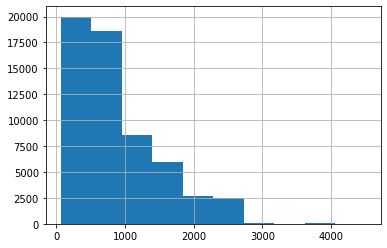

In [49]:
df.DIST.hist()

In [50]:
df.DIST.describe()

count    58492.000000
mean       872.900072
std        624.996805
min         67.000000
25%        391.000000
50%        690.000000
75%       1199.000000
max       4502.000000
Name: DIST, dtype: float64

`-` 구간을 아래와 같이 설정한다. 

In [51]:
bins=[-np.inf, 400, 700, 1200, np.inf] 

`-` pd.cut()을 이용하여 각 구간의 observation를 카테고리화 하자. 

In [53]:
cuts=pd.cut(df.DIST,bins=bins)  #적용할 열과 bins(구간) 넣어주기
cuts

0         (400.0, 700.0]
1          (1200.0, inf]
2         (400.0, 700.0]
3        (700.0, 1200.0]
4          (1200.0, inf]
              ...       
58487      (1200.0, inf]
58488     (400.0, 700.0]
58489      (-inf, 400.0]
58490    (700.0, 1200.0]
58491     (400.0, 700.0]
Name: DIST, Length: 58492, dtype: category
Categories (4, interval[float64, right]): [(-inf, 400.0] < (400.0, 700.0] < (700.0, 1200.0] < (1200.0, inf]]

`-` cuts, AIRLINE $\to$ {DIVERTED: sum}

In [55]:
df.groupby([cuts,'AIRLINE']).agg({'DIVERTED':sum})

DIVERTED
DIST            AIRLINE          
(-inf, 400.0]   AA              0
                AS              0
                B6              0
                DL              1
                EV              3
                F9              0
                HA              0
                MQ              0
                NK              0
                OO              5
                UA              2
                US              0
                VX              0
                WN              1
(400.0, 700.0]  AA              3
                AS              0
                B6              0
                DL             12
                EV              8
                F9              1
                HA              0
                MQ              4
                NK              1
                OO              7
                UA              1
                US              0
                VX              0
                WN              2
(700.0, 1200.0] AA             10
                AS              0
                B6              1
                DL              6
                EV              4
                F9              0
                HA              0
                MQ              1
                NK              1
                OO              5
                UA              4
                US              0
                VX              0
                WN              4
(1200.0, inf]   AA             13
                AS              0
                B6              1
                DL              5
                EV              0
                F9              1
                HA              1
                MQ              0
                NK              3
                OO              4
                UA             12
                US              1
                VX              1
                WN              8

`-` 아래와 비교해보자.  
`-` 아래의 표는 cut으로 구분되지 않아서 어디에 데이터가 몰려있는지 등을 확인할 수 없음

In [58]:
df.groupby(['AIRLINE']).agg({'DIVERTED':sum})

,DIVERTED
AIRLINE,
AA,26
AS,0
B6,2
DL,24
EV,15
F9,2
HA,1
MQ,5
NK,5


`-` cuts을 이용하여 추가그룹핑을 하면 조금 다른 특징들을 데이터에서 발견할 수 있다. 
- AA항공사와 DL항공사는 모두 비슷한 우회횟수를 가지고 있음. 
- AA항공사는 700회이상의 구간에서 우회를 많이하고 DL항공사는 400~700사이에서 우회를 많이 한다. (패턴이 다름) 

`-` 구간이름에 label을 붙이는 방법 

In [59]:
bins

[-inf, 400, 700, 1200, inf]

In [61]:
cuts2=pd.cut(df.DIST,bins=bins,labels=['Q1','Q2','Q3','Q4'])   #label로 간단하게!
cuts2

0        Q2
1        Q4
2        Q2
3        Q3
4        Q4
         ..
58487    Q4
58488    Q2
58489    Q1
58490    Q3
58491    Q2
Name: DIST, Length: 58492, dtype: category
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

In [62]:
df.groupby(by=[cuts2,'AIRLINE']).agg({'DIVERTED':sum})

DIVERTED
DIST AIRLINE          
Q1   AA              0
     AS              0
     B6              0
     DL              1
     EV              3
     F9              0
     HA              0
     MQ              0
     NK              0
     OO              5
     UA              2
     US              0
     VX              0
     WN              1
Q2   AA              3
     AS              0
     B6              0
     DL             12
     EV              8
     F9              1
     HA              0
     MQ              4
     NK              1
     OO              7
     UA              1
     US              0
     VX              0
     WN              2
Q3   AA             10
     AS              0
     B6              1
     DL              6
     EV              4
     F9              0
     HA              0
     MQ              1
     NK              1
     OO              5
     UA              4
     US              0
     VX              0
     WN              4
Q4   AA             13
     AS              0
     B6              1
     DL              5
     EV              0
     F9              1
     HA              1
     MQ              0
     NK              3
     OO              4
     UA             12
     US              1
     VX              1
     WN              8

In [66]:
df.groupby(cuts2).agg({'DIVERTED':len})  #observation 수

,DIVERTED
DIST,
Q1,15027
Q2,14697
Q3,14417
Q4,14351


-----

In [67]:
import pandas as pd 
import numpy as np 
from plotnine import * 
import matplotlib.pyplot as plt 

## tidy data 

`-` 느낌: ggplot으로 그림 그리기 좋은 데이터 + pandas로 query, group by 등을 쓰기 좋은 자료 

`-` 정의: https://r4ds.had.co.nz/tidy-data.html
- Each variable must have its own column.
- Each observation must have its own row.
- Each value must have its own cell.

예시1

|obs|x|y|shape|color|
|:-:|:-:|:-:|:-:|:-:|
|0|0|0 |'star'|'F'|
|1|0|1 |'circ'|'F'|
|2|1|0 |'star'|'M'|
|3|1|1 |'circ'|'M'|

예시2

| |shape=star|shape=circ|
|:-:|:-:|:-:|
|color=F|(0,0)|(0,1)|
|color=M|(1,0)|(1,1)|



### 예제 

`-` https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/state_fruit.csv

#### 풀이1: stack + reset_index  

`-` 문제의 깃헙주소로 들어가서 데이터를 관찰 $\to$ 좌측상단이 비워져있음 $\to$ `index_col=0` 옵션을 사용(인덱스 열을 0번째(첫번째)열로 지정한다는 의미) 

In [93]:
url = 'https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/state_fruit.csv'
df=pd.read_csv(url,index_col=0)
df

,Apple,Orange,Banana
Texas,12,10,40
Arizona,9,7,12
Florida,0,14,190


`-` 데이터변형

In [94]:
df.stack()

Texas    Apple      12
         Orange     10
         Banana     40
Arizona  Apple       9
         Orange      7
         Banana     12
Florida  Apple       0
         Orange     14
         Banana    190
dtype: int64

In [95]:
df.stack().reset_index()

,level_0,level_1,0
0,Texas,Apple,12
1,Texas,Orange,10
2,Texas,Banana,40
3,Arizona,Apple,9
4,Arizona,Orange,7
5,Arizona,Banana,12
6,Florida,Apple,0
7,Florida,Orange,14
8,Florida,Banana,190


In [96]:
df.stack().reset_index().rename(columns={'level_0':'group1','level_1':'group2',0:'X'})

,group1,group2,X
0,Texas,Apple,12
1,Texas,Orange,10
2,Texas,Banana,40
3,Arizona,Apple,9
4,Arizona,Orange,7
5,Arizona,Banana,12
6,Florida,Apple,0
7,Florida,Orange,14
8,Florida,Banana,190


In [97]:
_.columns

Index(['group1', 'group2', 'X'], dtype='object')

`-` **wide form이 아닌 long form이 tidy data에 가깝다.**

#### 풀이2: melt(id_vars=??)

`-` `index_col=0` 옵션을 사용하지않음 

In [100]:
url = 'https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/state_fruit.csv'
df2=pd.read_csv(url)
df2

,Unnamed: 0,Apple,Orange,Banana
0,Texas,12,10,40
1,Arizona,9,7,12
2,Florida,0,14,190


In [101]:
df2.rename(columns={'Unnamed: 0':'group1'})

,group1,Apple,Orange,Banana
0,Texas,12,10,40
1,Arizona,9,7,12
2,Florida,0,14,190


In [105]:
df2.rename(columns={'Unnamed: 0':'group1'}).melt()  #melt 등장! long 데이터 형태로 변하는데 뭔가 이상하다..

,variable,value
0,group1,Texas
1,group1,Arizona
2,group1,Florida
3,Apple,12
4,Apple,9
5,Apple,0
6,Orange,10
7,Orange,7
8,Orange,14
9,Banana,40


In [107]:
df2.rename(columns={'Unnamed: 0':'group1'}).melt(id_vars='group1')  # 움직이지 않아야 할 열을 중심으로 정리!

,group1,variable,value
0,Texas,Apple,12
1,Arizona,Apple,9
2,Florida,Apple,0
3,Texas,Orange,10
4,Arizona,Orange,7
5,Florida,Orange,14
6,Texas,Banana,40
7,Arizona,Banana,12
8,Florida,Banana,190


In [116]:
df2.rename(columns={'Unnamed: 0':'group1'}).melt(id_vars='group1')\
.rename(columns={'variable':'group2','value':'X'})

,group1,group2,X
0,Texas,Apple,12
1,Arizona,Apple,9
2,Florida,Apple,0
3,Texas,Orange,10
4,Arizona,Orange,7
5,Florida,Orange,14
6,Texas,Banana,40
7,Arizona,Banana,12
8,Florida,Banana,190


#### 틀린풀이1

In [117]:
df

,Apple,Orange,Banana
Texas,12,10,40
Arizona,9,7,12
Florida,0,14,190


In [118]:
df.melt()

,variable,value
0,Apple,12
1,Apple,9
2,Apple,0
3,Orange,10
4,Orange,7
5,Orange,14
6,Banana,40
7,Banana,12
8,Banana,190


`-` tidy data처럼 보이지만 지역 열이 삭제됨. melt는 인덱스를 날려버리고 정리를 하기 때문임.

#### 틀린풀이2

In [119]:
df2

,Unnamed: 0,Apple,Orange,Banana
0,Texas,12,10,40
1,Arizona,9,7,12
2,Florida,0,14,190


In [120]:
df2.stack()

0  Unnamed: 0      Texas
   Apple              12
   Orange             10
   Banana             40
1  Unnamed: 0    Arizona
   Apple               9
   Orange              7
   Banana             12
2  Unnamed: 0    Florida
   Apple               0
   Orange             14
   Banana            190
dtype: object

`-`multi index가 생김. index를 날리기 힘들고.. 우리가 더 이상 데이터를 가공할 수 없음. 유의하기!

#### 풀이3 

In [121]:
df

,Apple,Orange,Banana
Texas,12,10,40
Arizona,9,7,12
Florida,0,14,190


In [122]:
df.reset_index()

,index,Apple,Orange,Banana
0,Texas,12,10,40
1,Arizona,9,7,12
2,Florida,0,14,190


In [123]:
df.reset_index().melt(id_vars='index')

,index,variable,value
0,Texas,Apple,12
1,Arizona,Apple,9
2,Florida,Apple,0
3,Texas,Orange,10
4,Arizona,Orange,7
5,Florida,Orange,14
6,Texas,Banana,40
7,Arizona,Banana,12
8,Florida,Banana,190


In [124]:
df.reset_index().melt(id_vars='index')\
.rename(columns={'index':'group1','variable':'group2','value':'X'})

,group1,group2,X
0,Texas,Apple,12
1,Arizona,Apple,9
2,Florida,Apple,0
3,Texas,Orange,10
4,Arizona,Orange,7
5,Florida,Orange,14
6,Texas,Banana,40
7,Arizona,Banana,12
8,Florida,Banana,190


#### 풀이4

In [128]:
df2

,Unnamed: 0,Apple,Orange,Banana
0,Texas,12,10,40
1,Arizona,9,7,12
2,Florida,0,14,190


In [129]:
df2.set_index('Unnamed: 0')   #여기는 set을 먼저

,Apple,Orange,Banana
Unnamed: 0,,,
Texas,12,10,40
Arizona,9,7,12
Florida,0,14,190


In [130]:
df2.set_index('Unnamed: 0').stack()

Unnamed: 0        
Texas       Apple      12
            Orange     10
            Banana     40
Arizona     Apple       9
            Orange      7
            Banana     12
Florida     Apple       0
            Orange     14
            Banana    190
dtype: int64

In [132]:
df2.set_index('Unnamed: 0').stack().reset_index()

,Unnamed: 0,level_1,0
0,Texas,Apple,12
1,Texas,Orange,10
2,Texas,Banana,40
3,Arizona,Apple,9
4,Arizona,Orange,7
5,Arizona,Banana,12
6,Florida,Apple,0
7,Florida,Orange,14
8,Florida,Banana,190


**(★) 잘 기억해둘 것**

In [133]:
df2.set_index('Unnamed: 0').stack().reset_index()\
.rename(columns={'Unnamed: 0':'group1','level_1':'group2',0:'X'})

,group1,group2,X
0,Texas,Apple,12
1,Texas,Orange,10
2,Texas,Banana,40
3,Arizona,Apple,9
4,Arizona,Orange,7
5,Arizona,Banana,12
6,Florida,Apple,0
7,Florida,Orange,14
8,Florida,Banana,190


---

## Barplot + 해들리위컴의 그래프레이어 

#### 기본사용법

In [205]:
g=['A']*100+['B']*200 
y=list(np.random.randn(100)*2+2)+list(np.random.randn(200)+3)
df=pd.DataFrame({'g':g,'y':y})
df

,g,y
0,A,3.181306
1,A,1.188959
2,A,2.730263
3,A,-1.068643
4,A,1.389275
...,...,...
295,B,2.644691
296,B,2.030139
297,B,3.042280
298,B,2.655438


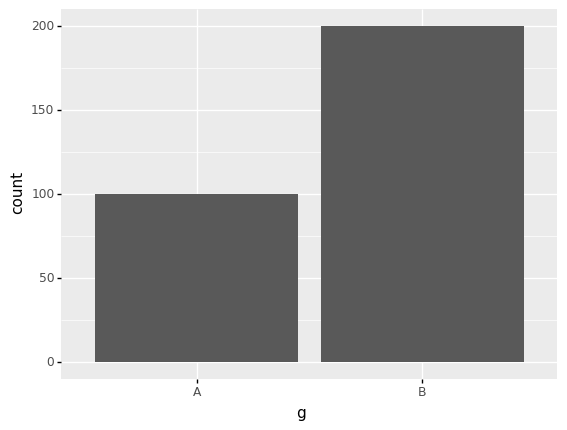

<ggplot: (8790921495932)>

In [206]:
ggplot(df)+geom_bar(aes(x='g')) ## 디폴트로 카운트를 수행해줌

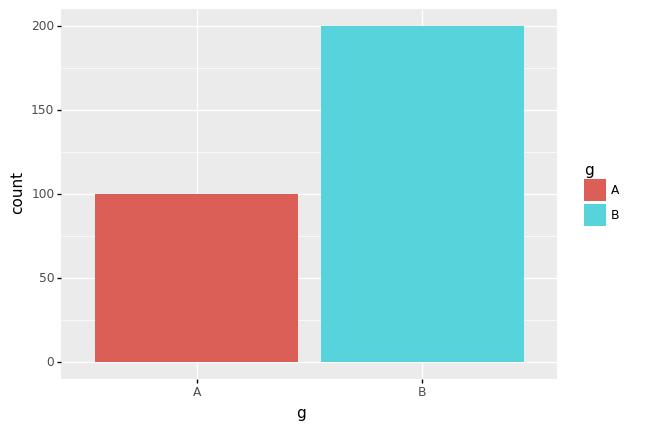

<ggplot: (8790921462080)>

In [207]:
ggplot(df)+geom_bar(aes(x='g',fill='g')) ## color는 테두리만 색깔이 바뀌고 fill을 해야 색이 채워짐

`-` 이것은 아래의 코드와 같다. 

In [138]:
df.groupby(by='g').count()

,y
g,
A,100
B,200


In [208]:
df.groupby(by='g').count().reset_index()  #tidy data로

,g,y
0,A,100
1,B,200


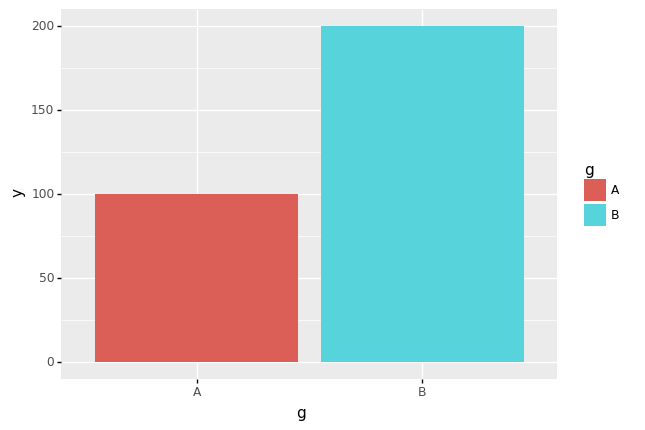

<ggplot: (8790922467422)>

In [209]:
fig=ggplot(df.groupby(by='g').count().reset_index())
fig+geom_bar(aes(x='g',y='y',fill='g'),stat='identity')   #stat=identity는 디폴트(아무것도 안한다)

`-` barplot은 기본적으로 groupby+count()가 내장되어 있다. 따라서 아래의 코드 

```r
ggplot(df)+geom_bar(aes(x='g',fill='g')) ## 디폴트로 카운트를 수행해줌
```

를 좀더 엄밀하게 쓰면 

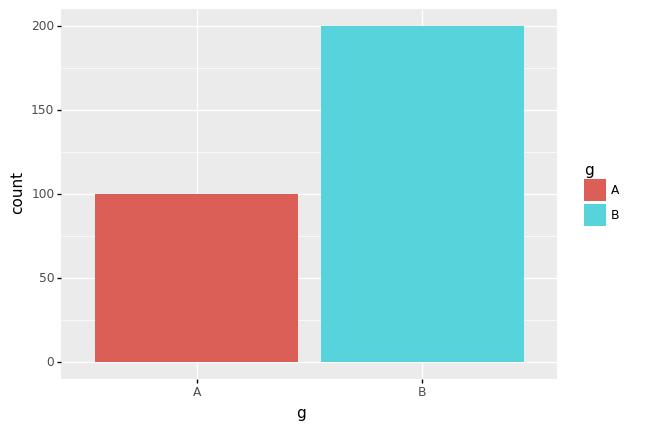

<ggplot: (8790921646918)>

In [210]:
ggplot(df)+geom_bar(aes(x='g',fill='g'),stat='count') 

`-` 이것은 때때로 불편하다. 왜냐하면 데이터프레임을 변환하는 것은 판다스를 이용하는게 더 쉽고 자유로움 

#### barplot의 불편한점1

In [211]:
td=df.groupby(by='g').count().reset_index()
td

,g,y
0,A,100
1,B,200


`-` 그냥 'x=g, y=y'를 맵핑하여 그리면 안되나? 

<BarContainer object of 2 artists>

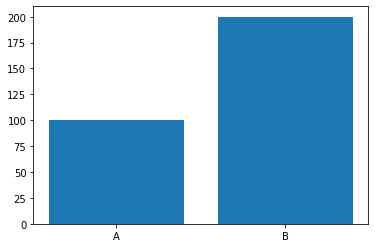

In [212]:
plt.bar(td.g,td.y)

<AxesSubplot:xlabel='g'>

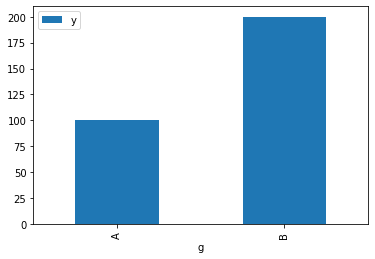

In [213]:
td.plot(kind='bar',x='g',y='y')

`-` 그런데 ggplot을 쓰려고 하면?

In [214]:
ggplot(td)+geom_bar(aes(x='g',y='y',fill='g')) 

PlotnineError: 'stat_count() must not be used with a y aesthetic'

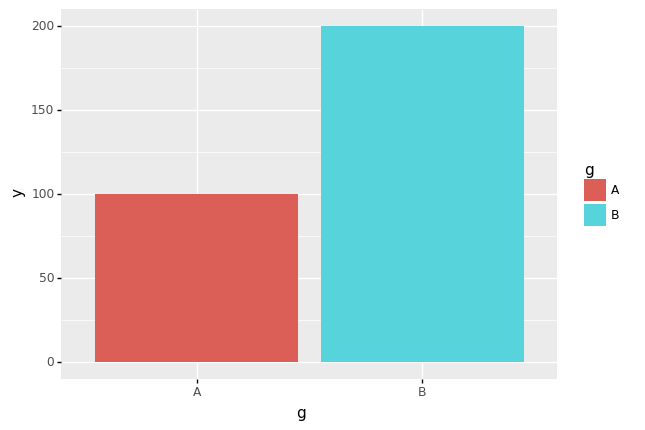

<ggplot: (8790922568753)>

In [215]:
ggplot(td)+geom_bar(aes(x='g',y='y',fill='g'),stat='identity') 

- 너무 불편해요.. stat='identity' 를 항상 써야하는것이!

#### barplot의 불편한점2

`-` groupby 를 자동으로 해주므로 익숙해지면 ggplot2 방식이 더 편하지 않을까? $\to$ groupby 하는게 더 편해요.. 

In [216]:
df.groupby('g').agg({'y':[np.mean,np.median,np.std,lambda x: np.max(x)-np.min(x)]})

y                               
       mean    median       std <lambda_0>
g                                         
A  2.283178  2.212013  1.888870   9.050326
B  3.017802  2.970615  0.915089   5.245791

In [217]:
df.groupby('g')\
.agg({'y':[np.mean,np.median,np.std,lambda x: np.max(x)-np.min(x)]})\
.rename(columns={'<lambda_0>':'range'}).stack().reset_index()

,g,level_1,y
0,A,mean,2.283178
1,A,median,2.212013
2,A,range,9.050326
3,A,std,1.888870
4,B,mean,3.017802
5,B,median,2.970615
6,B,range,5.245791
7,B,std,0.915089


In [160]:
td=df.groupby('g')\
.agg({'y':[np.mean,np.median,np.std,lambda x: np.max(x)-np.min(x)]})\
.rename(columns={'<lambda_0>':'range'}).stack().reset_index()

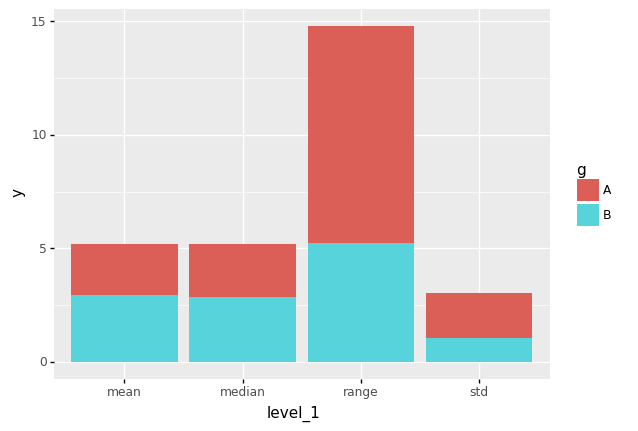

<ggplot: (8790922059879)>

In [161]:
ggplot(td)+geom_bar(aes(x='level_1',y='y',fill='g'),stat='identity')

- 쌓인상태로 보이는것이 불편함. $\to$ position='dodge' 로!

#### position 

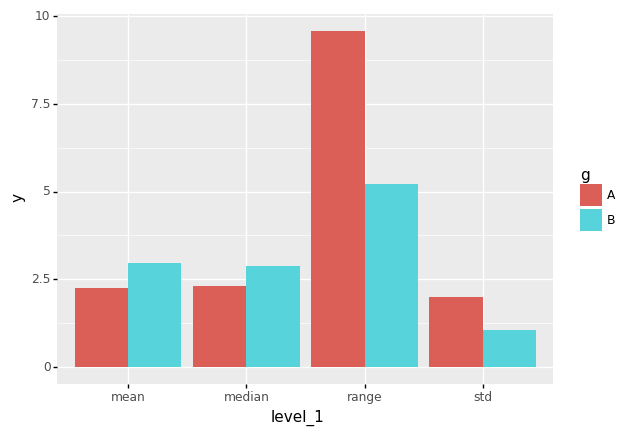

<ggplot: (8790922494094)>

In [162]:
ggplot(td)+geom_bar(aes(x='level_1',y='y',fill='g'),stat='identity',position='dodge')

#### coord_flip()

`-` 때때로 아래와 같이 보는 것이 더 좋은 경우도 있음 

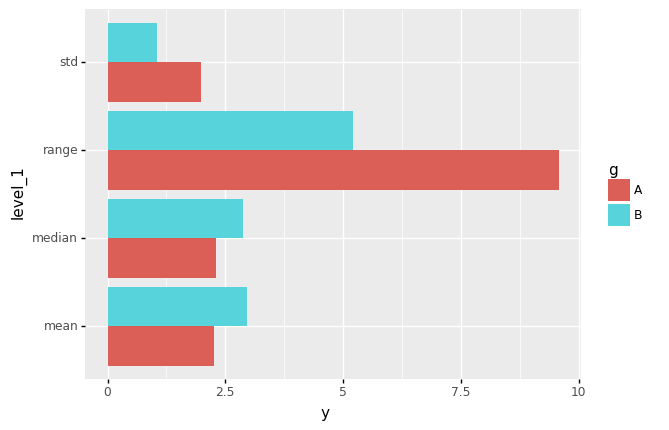

<ggplot: (8790922399223)>

In [163]:
ggplot(td)\
+geom_bar(aes(x='level_1',y='y',fill='g'),stat='identity',position='dodge')\
+coord_flip()

#### facet_wrap()

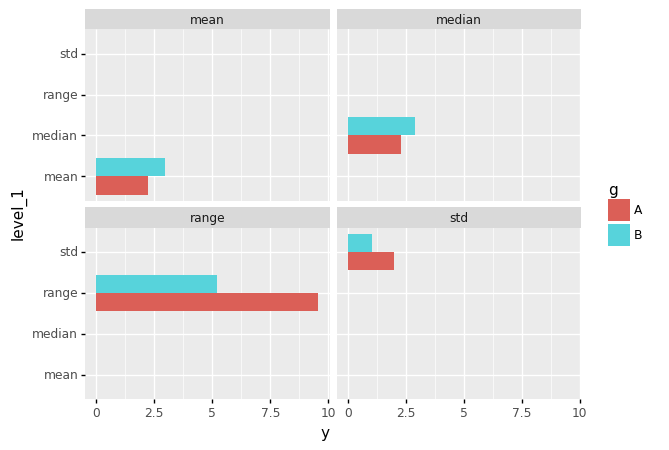

<ggplot: (8790922314993)>

In [164]:
ggplot(td)\
+geom_bar(aes(x='level_1',y='y',fill='g'),stat='identity',position='dodge')\
+coord_flip()+facet_wrap('level_1')

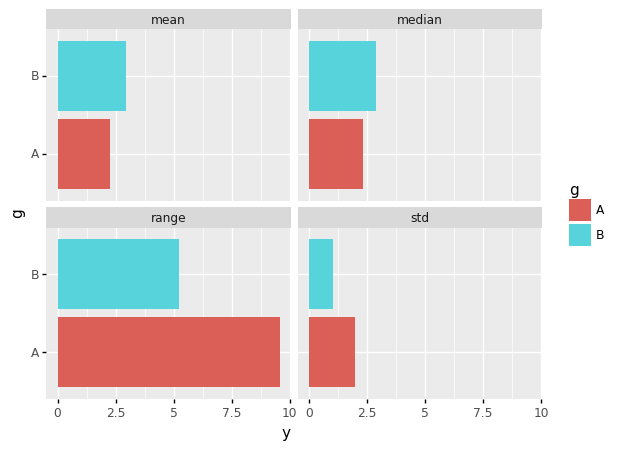

<ggplot: (8790922169869)>

In [165]:
ggplot(td)\
+geom_bar(aes(x='g',y='y',fill='g'),stat='identity',position='dodge')\
+coord_flip()+facet_wrap('level_1')

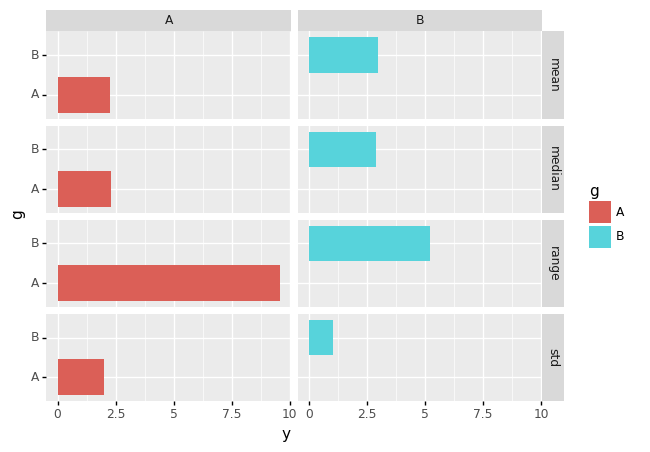

<ggplot: (8790921898840)>

In [166]:
ggplot(td)+facet_grid('level_1~g')\
+geom_bar(aes(x='g',y='y',fill='g'),stat='identity',position='dodge')+coord_flip()

#### 해들리위컴의 그래프레이어

`-` 데이터셋 + 맵핑 + 지옴 + 포지션 + 스탯 + 축 + 면분할 
- 데이터셋: 판다스 
- 맵핑: x축, y축, 색깔, 크기, 투명도 
- 지옴: 포인트지옴, 바지옴, 라인지옴, 스무스지옴 
- 포지션: jitter, dodge, intentity 
- 스탯: identity, count 
- 축: coord_flip()
- 면분할: facet_wrap(), facet_grid()

---

## 예제: 심슨의 역설

In [167]:
DEP=(['A1']*2+['A2']*2+['B1']*2+['B2']*2)*2 
GEN=['M']*8+['F']*8
STATE=['PASS','FAIL']*8
COUNT=[1,9,2,8,80,20,85,15,5,5,5,5,9,1,9,1]

In [168]:
df=pd.DataFrame({'DEP':DEP,'STATE':STATE,'GEN':GEN,'COUNT':COUNT})

In [169]:
df

,DEP,STATE,GEN,COUNT
0,A1,PASS,M,1
1,A1,FAIL,M,9
2,A2,PASS,M,2
3,A2,FAIL,M,8
4,B1,PASS,M,80
5,B1,FAIL,M,20
6,B2,PASS,M,85
7,B2,FAIL,M,15
8,A1,PASS,F,5
9,A1,FAIL,F,5


In [172]:
df.groupby(['GEN','STATE']).agg({'COUNT':np.sum})

COUNT
GEN STATE       
F   FAIL      12
    PASS      28
M   FAIL      52
    PASS     168

### 시각화1:

In [174]:
df.groupby(['GEN','STATE']).agg({'COUNT':np.sum})

COUNT
GEN STATE       
F   FAIL      12
    PASS      28
M   FAIL      52
    PASS     168

In [175]:
df.groupby(['GEN','STATE']).agg({'COUNT':np.sum}).reset_index()

,GEN,STATE,COUNT
0,F,FAIL,12
1,F,PASS,28
2,M,FAIL,52
3,M,PASS,168


In [176]:
df.groupby(['GEN']).agg({'COUNT':np.sum}).reset_index()

,GEN,COUNT
0,F,40
1,M,220


`-` 두개의 데이터프레임을 합쳐야 한다. 

In [177]:
_df1=df.groupby(['GEN','STATE']).agg({'COUNT':np.sum}).reset_index()
_df2=df.groupby(['GEN']).agg({'COUNT':np.sum}).reset_index().rename(columns={'COUNT':'SUM'})

In [178]:
display(_df1)
display(_df2)

,GEN,STATE,COUNT
0,F,FAIL,12
1,F,PASS,28
2,M,FAIL,52
3,M,PASS,168


,GEN,SUM
0,F,40
1,M,220


`-` 단순한 방법 : 확장성 없음

In [179]:
def f(x): 
    if x=='F':
        return 40 
    if x=='M':
        return 220 

In [181]:
_df1['SUM']=list(map(f,_df1.GEN))
_df1

,GEN,STATE,COUNT,SUM
0,F,FAIL,12,40
1,F,PASS,28,40
2,M,FAIL,52,220
3,M,PASS,168,220


`-` 좀 더 좋은 방법 

In [182]:
_df1=df.groupby(['GEN','STATE']).agg({'COUNT':np.sum}).reset_index()

- _df1를 다시 롤백

- 함수 자체를 return 해버린다!

In [183]:
def f(_df2): 
    return lambda x: _df2.query('GEN == @x').SUM.item()

In [184]:
_df1.GEN

0    F
1    F
2    M
3    M
Name: GEN, dtype: object

In [185]:
_df1['SUM']=list(map(f(_df2),_df1.GEN))
_df1

,GEN,STATE,COUNT,SUM
0,F,FAIL,12,40
1,F,PASS,28,40
2,M,FAIL,52,220
3,M,PASS,168,220


`-` 더 좋은 방법

In [186]:
_df1=df.groupby(['GEN','STATE']).agg({'COUNT':np.sum}).reset_index()

- _df1을 다시 롤백

In [187]:
_df1

,GEN,STATE,COUNT
0,F,FAIL,12
1,F,PASS,28
2,M,FAIL,52
3,M,PASS,168


In [188]:
_df2

,GEN,SUM
0,F,40
1,M,220


In [189]:
pd.merge(_df1,_df2)

,GEN,STATE,COUNT,SUM
0,F,FAIL,12,40
1,F,PASS,28,40
2,M,FAIL,52,220
3,M,PASS,168,220


In [190]:
_df1.merge(_df2)

,GEN,STATE,COUNT,SUM
0,F,FAIL,12,40
1,F,PASS,28,40
2,M,FAIL,52,220
3,M,PASS,168,220


In [191]:
_df2.merge(_df1)

,GEN,SUM,STATE,COUNT
0,F,40,FAIL,12
1,F,40,PASS,28
2,M,220,FAIL,52
3,M,220,PASS,168


In [192]:
td=_df2.merge(_df1)
td

,GEN,SUM,STATE,COUNT
0,F,40,FAIL,12
1,F,40,PASS,28
2,M,220,FAIL,52
3,M,220,PASS,168


In [193]:
td['PROP']=td.COUNT/td.SUM

In [194]:
td

,GEN,SUM,STATE,COUNT,PROP
0,F,40,FAIL,12,0.300000
1,F,40,PASS,28,0.700000
2,M,220,FAIL,52,0.236364
3,M,220,PASS,168,0.763636


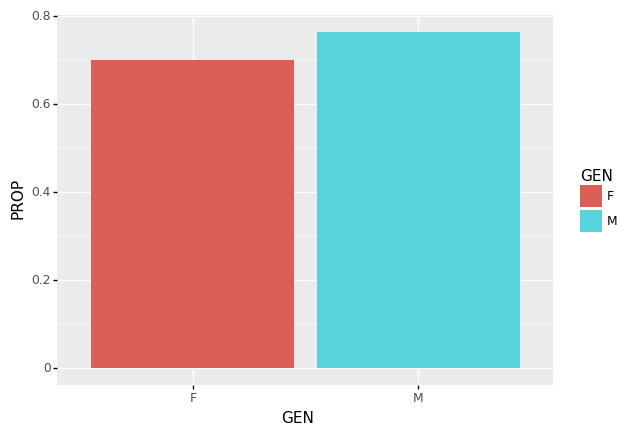

<ggplot: (8790921709026)>

In [195]:
ggplot(td.query('STATE=="PASS"'))+geom_bar(aes(x='GEN',y='PROP',fill='GEN'),stat='identity')

`-` 남자의 합격률이 더 높다. $\to$ 성차별이 있어보인다(?)

### 시각화2: 학과별 합격률

`-` 학과별 합격률 

In [196]:
df

,DEP,STATE,GEN,COUNT
0,A1,PASS,M,1
1,A1,FAIL,M,9
2,A2,PASS,M,2
3,A2,FAIL,M,8
4,B1,PASS,M,80
5,B1,FAIL,M,20
6,B2,PASS,M,85
7,B2,FAIL,M,15
8,A1,PASS,F,5
9,A1,FAIL,F,5


In [197]:
td=df.groupby(['DEP','GEN']).agg({'COUNT':sum}).reset_index()\
.rename(columns={'COUNT':'SUM'}).merge(df)

In [198]:
td['PROP']=td.COUNT/td.SUM

In [199]:
td

,DEP,GEN,SUM,STATE,COUNT,PROP
0,A1,F,10,PASS,5,0.50
1,A1,F,10,FAIL,5,0.50
2,A1,M,10,PASS,1,0.10
3,A1,M,10,FAIL,9,0.90
4,A2,F,10,PASS,5,0.50
5,A2,F,10,FAIL,5,0.50
6,A2,M,10,PASS,2,0.20
7,A2,M,10,FAIL,8,0.80
8,B1,F,10,PASS,9,0.90
9,B1,F,10,FAIL,1,0.10


In [201]:
td.query('STATE=="PASS"')   #합격한 애들만 보기

,DEP,GEN,SUM,STATE,COUNT,PROP
0,A1,F,10,PASS,5,0.50
2,A1,M,10,PASS,1,0.10
4,A2,F,10,PASS,5,0.50
6,A2,M,10,PASS,2,0.20
8,B1,F,10,PASS,9,0.90
10,B1,M,100,PASS,80,0.80
12,B2,F,10,PASS,9,0.90
14,B2,M,100,PASS,85,0.85


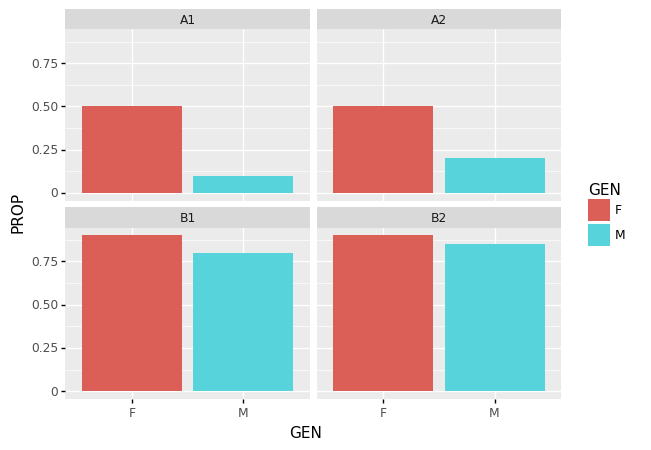

<ggplot: (8790921680839)>

In [202]:
ggplot(td.query('STATE=="PASS"'))\
+geom_bar(aes(x='GEN',y='PROP',fill='GEN'),stat='identity')\
+facet_wrap('DEP')